# **BDDA PROJECT**
MADE BY - GROUP 7


*   Swapnil Malik-015016
*   Sumit Gupta- 015022

*   Muskan Jain- 015034
*   Pragya Jain- 015038

*   Sarthak Kumar- 015042










In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving store.csv to store.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

IMPORT DATA

In [4]:
store = pd.read_csv('store.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NUMBER OF ROWS AND COLUMNS

In [5]:
print(train.shape)
print(test.shape)
print(store.shape)

(1017209, 9)
(41088, 8)
(1115, 10)


In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [9]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [10]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [11]:
train.describe(include='object')

,Date,StateHoliday
count,1017209,1017209
unique,942,5
top,2013-12-08,0
freq,1115,855087


In [12]:
train.describe()[['Sales','Customers']]

,Sales,Customers
count,1.017209e+06,1.017209e+06
mean,5.773819e+03,6.331459e+02
std,3.849926e+03,4.644117e+02
min,0.000000e+00,0.000000e+00
25%,3.727000e+03,4.050000e+02
50%,5.744000e+03,6.090000e+02
75%,7.856000e+03,8.370000e+02
max,4.155100e+04,7.388000e+03


Average number of customers across all the stores every day is 633,
Average sales across all the stores everyday is about 57738 units

In [13]:
train.Store.nunique()


1115

We have a total of 1115 Stores all across

In [14]:
train.DayOfWeek.value_counts().sort_values()

7    144730
6    144730
1    144730
2    145664
3    145665
5    145845
4    145845
Name: DayOfWeek, dtype: int64

In [15]:
print(train.Open.value_counts() , '\n',train.Promo.value_counts())

1    844392
0    172817
Name: Open, dtype: int64 
 0    629129
1    388080
Name: Promo, dtype: int64


In [16]:
print(train.isna().sum())
print('-'*20)
print(store.isna().sum())
print('-'*20)
print(test.isna().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
--------------------
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
--------------------
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [17]:
store1 = train[train['Store']==1]
store1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [18]:
print(store1.shape)

(942, 9)


In [19]:
store1['Date'] = pd.to_datetime(store1['Date'])
print(min(store1['Date']))
print(max(store1['Date']))
store1['Year'] = store1['Date'].dt.year
store1['Month'] = store1['Date'].dt.month

2013-01-01 00:00:00
2015-07-31 00:00:00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

NameError: ignored

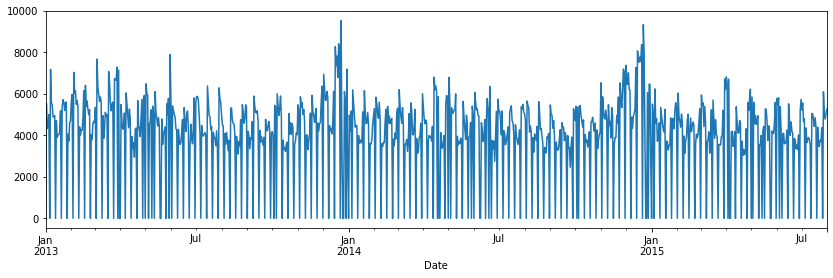

In [20]:
store1.resample('1D',on='Date')['Sales'].sum().plot.line(figsize=(14,4))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: ignored

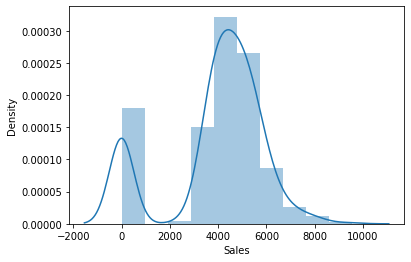

In [21]:
import seaborn as sns
sns.distplot(store1.Sales , bins=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: ignored

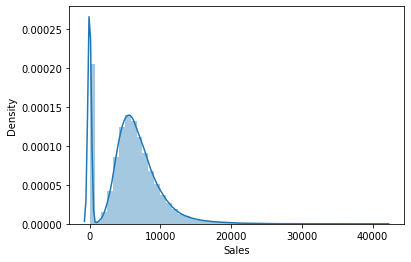

In [22]:
sns.distplot(train.Sales)
plt.show()

The sales are 0 for many records , which might be because the stores are closed

TREATING MISSING VALUES

In [23]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [24]:
store[store['Store']==1].T

,0
Store,1
StoreType,c
Assortment,a
CompetitionDistance,1270
CompetitionOpenSinceMonth,9
CompetitionOpenSinceYear,2008
Promo2,0
Promo2SinceWeek,NaN
Promo2SinceYear,NaN
PromoInterval,NaN


In [25]:
store[~(store['Promo2']==0)].iloc[0]

Store                                      2
StoreType                                  a
Assortment                                 a
CompetitionDistance                      570
CompetitionOpenSinceMonth                 11
CompetitionOpenSinceYear                2007
Promo2                                     1
Promo2SinceWeek                           13
Promo2SinceYear                         2010
PromoInterval                Jan,Apr,Jul,Oct
Name: 1, dtype: object

Fill Promo2SinceWeek with 0 &
Promo2SinceYear & PromoInterval with mode ,
Fill CompetitionDistance with max value to keep them far from the stores since we dont know about them
CompetitionOpenSinceMonth & CompetitionOpenSinceYear with mode

In [26]:
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mode().iloc[0])
store['PromoInterval'] = store['PromoInterval'].fillna(store['PromoInterval'].mode().iloc[0])

store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].max())
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode().iloc[0])
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode().iloc[0])

In [28]:
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

MERGING DATA

In [29]:
df = train.merge(store , on='Store' , how='left')
print(train.shape)
print(store.shape)
print(df.shape)

(1017209, 9)
(1115, 10)
(1017209, 18)


In [30]:
df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [31]:
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [34]:
df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Day                                   int64
Month                                 int64
Year                                  int64
dtype: object

In [35]:
cat_cols = df.select_dtypes(include=['object']).columns

for i in cat_cols:
    print(i)
    print(df[i].value_counts())
    print('-'*20)

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
--------------------
StoreType
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
--------------------
Assortment
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
--------------------
PromoInterval
Jan,Apr,Jul,Oct     801153
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64
--------------------


In [36]:
df['StateHoliday'] = df['StateHoliday'].map({'0':0 , 0:0 , 'a':1 , 'b':2 , 'c':3})
df['StateHoliday'] = df['StateHoliday'].astype(int)

In [37]:
df['StoreType'] = df['StoreType'].map({'a':1 , 'b':2 , 'c':3 , 'd':4})
df['StoreType'] = df['StoreType'].astype(int)

In [38]:
df['Assortment'] = df['Assortment'].map({'a':1 , 'b':2 , 'c':3})
df['Assortment'] = df['Assortment'].astype(int)

In [39]:
df['PromoInterval'] = df['PromoInterval'].map({'Jan,Apr,Jul,Oct':1 , 'Feb,May,Aug,Nov':2 , 'Mar,Jun,Sept,Dec':3})
df['PromoInterval'] = df['PromoInterval'].astype(int)

In [40]:
 df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                         int64
Day                                   int64
Month                                 int64
Year                                  int64
dtype: object

UNDERSTANDING DATA

In [50]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209.0,0.05,0.28,0.0,0.0,0.0,0.0,3.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
StoreType,1017209.0,2.21,1.37,1.0,1.0,1.0,4.0,4.0
Assortment,1017209.0,1.94,0.99,1.0,1.0,1.0,3.0,3.0


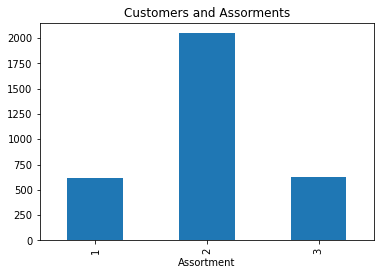

In [52]:
#Determining how Assortment affects the Customers
df = df.groupby(by=['Assortment'])['Customers'].mean()
df.head()
#Visualize how Customers vary according to assortmentsisualize how Customers vary according to assortments
#Plotting a bar chart to
df.plot(kind='bar',title='Customers and Assorments')

In [53]:
#There are 4 store types and 3 merchandise
#assortment types: a - basic; b - extra;
#c - extended.  They are distributed as
#follows.
store.groupby(['StoreType','Assortment']).Assortment.count()

StoreType  Assortment
a          a             381
           c             221
b          a               7
           b               9
           c               1
c          a              77
           c              71
d          a             128
           c             220
Name: Assortment, dtype: int64

Rossmann operates mostly in Germany where stores are typically closed on Sundays.

Of all the four store types, only Store Type 'b' opens on Sundays.

In [54]:
# Checking the data when the store is closed 
train_store_closed = train[(train.Open == 0)]
train_store_closed.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f886616c690>]],
      dtype=object)

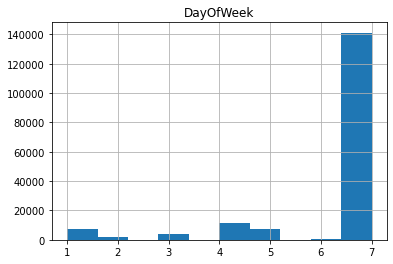

In [55]:
train_store_closed.hist('DayOfWeek')

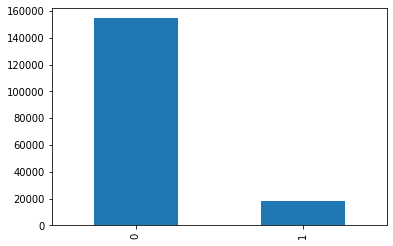

In [56]:
# Check whether there school was closed for holyday 
train_store_closed['SchoolHoliday'].value_counts().plot(kind='bar')

Here, 1 is school closed day and it pretty low. And 0 is None

TRAIN AND VALIDATE SPLIT

Applying Log Transformation of the Target Variable

In [41]:
#Applying Log Transformation of the Target Variable
X = df.drop(['Sales','Date','Customers'],1)
#Transform Target Variable
y = np.log(df['Sales']+1)

from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(X , y , test_size=0.30 , random_state = 1 )

X_train.shape , X_val.shape , y_train.shape , y_val.shape

((712046, 18), (305163, 18), (712046,), (305163,))

DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=11)
dt.fit(X_train , y_train)
y_pred_dt = dt.predict(X_val)

REVERSE THE TRANSFORMATION

In [43]:
y_pred_dt = np.exp(y_pred_dt)-1
y_val = np.exp(y_val)-1

In [44]:
from sklearn.metrics import r2_score , mean_squared_error

print(r2_score(y_val , y_pred_dt))
print(np.sqrt(mean_squared_error(y_val , y_pred_dt)))

0.7051012193446067
2093.5029810733513


RMSPE

In [45]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(y, yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe


ROOT MEAN SQUARE PERCENTAGE ERROR

In [46]:
rmspe(y_val,y_pred_dt)

0.3434285577002083

XGBOOST

In [48]:
import xgboost as xgb

In [49]:
dtrain = xgb.DMatrix(X_train,y_train)
dvalidate = xgb.DMatrix(X_val[X_train.columns],y_val)

params = {
    'eta' : 1,
    'max_depth' : 5,
    'objecive' : 'reg:linear'
}

model_xg = xgb.train(params, dtrain , 5)

y_pred_xg = model_xg.predict(dvalidate)

y_pred_xg = np.exp(y_pred_xg)-1


rmspe(y_val , y_pred_xg)

0.3739213810697574

HYPERPARAMATER TUNING

Customized Metric

In [65]:
def get_rmspe_score(model, input_values, y_actual):
    y_predicted=model.predict(input_values)
    y_actual=np.exp(y_actual)-1
    y_predicted=np.exp(y_predicted)-1
    score=rmspe(y_actual, y_predicted)
    return score

In [66]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth' : list(range(5,25))
}

base  = DecisionTreeRegressor()

model_tuned = RandomizedSearchCV(base , params , return_train_score=True).fit(X_train , y_train)

In [67]:
model_cv_results = pd.DataFrame(model_tuned.cv_results_).sort_values(by='mean_test_score' , ascending=False)
model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,3.838143,0.022907,0.059959,0.001917,24,{'max_depth': 24},0.996291,0.996360,0.996548,0.996598,0.996508,0.996461,0.000116,1,0.998770,0.998703,0.998764,0.998754,0.998685,0.998735,0.000035
2,3.725257,0.036359,0.057259,0.001944,23,{'max_depth': 23},0.996301,0.996226,0.996408,0.996544,0.996445,0.996385,0.000111,2,0.998545,0.998462,0.998528,0.998527,0.998477,0.998508,0.000032
0,3.219795,0.033960,0.041198,0.001694,18,{'max_depth': 18},0.995811,0.995640,0.995945,0.995946,0.995683,0.995805,0.000128,3,0.996932,0.996817,0.996993,0.996942,0.996832,0.996903,0.000068
7,3.040374,0.039312,0.037988,0.001282,17,{'max_depth': 17},0.995529,0.995302,0.995750,0.995681,0.995644,0.995581,0.000157,4,0.996461,0.996305,0.996470,0.996456,0.996383,0.996415,0.000063
4,2.914064,0.025602,0.036369,0.001594,16,{'max_depth': 16},0.995291,0.995102,0.995434,0.995457,0.995110,0.995279,0.000152,5,0.995935,0.995753,0.995936,0.995902,0.995840,0.995873,0.000070
9,2.553680,0.043097,0.027443,0.000506,13,{'max_depth': 13},0.993686,0.993468,0.993832,0.993804,0.993638,0.993685,0.000130,6,0.993933,0.993822,0.994004,0.993864,0.993930,0.993911,0.000063
5,2.255058,0.031691,0.024077,0.001449,11,{'max_depth': 11},0.992240,0.992204,0.992424,0.992403,0.992484,0.992351,0.000109,7,0.992426,0.992411,0.992506,0.992403,0.992447,0.992438,0.000037
3,1.753320,0.032734,0.021533,0.001217,8,{'max_depth': 8},0.990553,0.990542,0.990626,0.990674,0.990786,0.990636,0.000089,8,0.990677,0.990684,0.990660,0.990646,0.990620,0.990657,0.000023
1,1.595659,0.045803,0.019863,0.000217,7,{'max_depth': 7},0.990010,0.990028,0.990093,0.990184,0.990273,0.990118,0.000099,9,0.990154,0.990150,0.990134,0.990110,0.990087,0.990127,0.000025
8,1.174110,0.023054,0.018494,0.000743,5,{'max_depth': 5},0.989138,0.989153,0.989233,0.989288,0.989393,0.989241,0.000094,10,0.989267,0.989264,0.989244,0.989230,0.989203,0.989241,0.000023


NameError: ignored

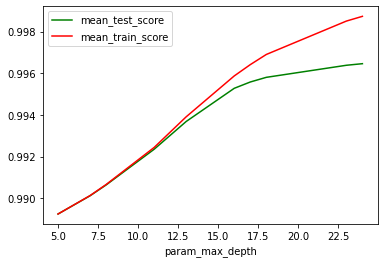

In [68]:
model_cv_results.set_index('param_max_depth')['mean_test_score'].plot(color='g',legend=True)
model_cv_results.set_index('param_max_depth')['mean_train_score'].plot(color='r' , legend=True)
plt.grid(True)
plt.show()

We can see that the model Underfits with the max_depth is <10 an=d Overfits , 
when the max_depth is >12 , 
So we can choose max_depth as 11